In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.reduction import ReductionSummarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download("punkt")
from sumy.utils import get_stop_words

from datasets import load_dataset , load_from_disk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
dataset = load_from_disk("../datasets/cleaned_xlsum_arabic")

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['summary', 'text'],
        num_rows: 32877
    })
    test: Dataset({
        features: ['summary', 'text'],
        num_rows: 4547
    })
    validation: Dataset({
        features: ['summary', 'text'],
        num_rows: 4559
    })
})

In [6]:
#in this method we not train model so split here is not critical 

In [151]:
data = dataset['train'].shuffle(seed=42).select(range(2000))['text']

In [152]:
data[0]

'يتوقع إيكلستون موافقة الاتحاد الدولي للسيارات على إدخال تعديلات على محركات السيارت المشاركة في السباق وتوقع إيكلستون خلال مؤتمر صحفي يوم الأحد على هامش سباق الجائزة الكبرى المقام في البحرين موافقة الاتحاد الدولي للسيارات على إدخال بعض التعديلات على محركات السيارات المشاركة في السباق. وأضاف: " قدم فريق مرسيدس أفضل أداء بلا شك، ولا ينبغي معاقبته على الأداء الجيد. فنحن لا ندخل هذه التعديلات للعقاب". وعبرت قطاعات من الجماهير وجهات الترويج للسباق عن استيائها من تخلي المسؤولين عن استخدام المحركات القديمة المكونة من ثماني أسطوانات ذات الصوت العالي واستخدام محركات توربينية مكونة من ست أسطوانات وتتسم بصوت منخفض، مع التأكيد على ضرورة الاقتصاد في استهلاك الوقود واستخدام التكنولوجيا الهجينة في صناعة المحركات. وانتقد فريقا فيراري وريدبول، اللذان يحاولان اللحاق بالفرق التي تستخدم محركات مرسيدس، الخطوة وطلبا إدخال بعض التعديلات على محركات السيارات في السباق، وذلك في الوقت الذي يتهمهما فيه المنافسون بإثارة القلق للتغطية على إخفاقهم. مواضيع قد تهمك نهاية "تعديلات ضرورية" ولا يستطيع مالك الحقوق التجاري

In [9]:
type(data)

list

# Using TF-IDF for Extractive Text Summarization

Extractive text summarization involves selecting key sentences from a document to create a concise summary. TF-IDF (Term Frequency-Inverse Document Frequency) is a useful method for identifying important sentences based on the significance of words they contain.

## Steps to Use TF-IDF for Extractive Summarization

1. **Preprocess the Text:**
   - Tokenize the text into sentences.
   - Further tokenize each sentence into words.
   - Remove stop words and apply stemming or lemmatization.

2. **Calculate TF-IDF Scores:**
   - Compute the term frequency (TF) for each word in each sentence.
   - Compute the inverse document frequency (IDF) for each word across all sentences.
   - Calculate the TF-IDF score for each word in each sentence by multiplying TF and IDF.

3. **Score Sentences:**
   - For each sentence, sum the TF-IDF scores of its words to get a sentence score.
   - Rank sentences based on their scores.

4. **Select Key Sentences:**
   - Choose the top-ranked sentences to form the summary. The number of sentences selected can be based on a predefined summary length or a threshold score.


In [35]:
def summary_with_tfidf(texts , num_summary_sentence=3):
    summaries = []
    for sentence in texts:
        sentences = nltk.tokenize.sent_tokenize(sentence)
        tfidfvectorizer = TfidfVectorizer()
        words_tfidf = tfidfvectorizer.fit_transform(sentences)
        #print(sentences)
        sent_sum = words_tfidf.sum(axis=1)
        extractive_sentence = np.argsort(sent_sum , axis=0)[::-1]
        
        text_summaries = []
        for i in range(0, len(sentences)):
            if i in extractive_sentence[:num_summary_sentence]:
                text_summaries.append(sentences[i])
        summaries.append("\n".join(text_summaries))
        
    return summaries
            
        
        

In [36]:
tfidf_text_summarization = summary_with_tfidf(data)

In [41]:
print(len(tfidf_text_summarization[1]))

569


In [40]:
print(len(data[1]))


2193


## Extractive Text Summarization using LSA with Sumy

Latent Semantic Analysis (LSA) is a technique used in extractive text summarization to identify and select important sentences based on the underlying semantic structure of the text. Here's a brief overview of how LSA works:

1. **Vector Space Representation:**

LSA represents the text as a matrix of term-document relationships.
Each sentence or document is represented as a vector in a high-dimensional space, where dimensions correspond to terms (words).

2. **Dimensionality Reduction:**

LSA employs Singular Value Decomposition (SVD) to reduce the dimensionality of the term-document matrix.
This reduction captures the latent (underlying) semantic relationships between terms and documents.

3. **Semantic Similarity Calculation:**

After dimensionality reduction, LSA calculates semantic similarity between sentences using cosine similarity or other metrics in the reduced space.
Sentences that are semantically similar to each other are likely to contain similar information.
Sentence Importance:

LSA assigns importance scores to sentences based on their similarity to other sentences in the text.
Sentences that are more similar to the overall content of the text are considered more important.

4. **Selection of Sentences:**

Based on these importance scores, LSA selects sentences that best represent the main themes and information of the text.
Typically, sentences with higher importance scores are chosen to form the summary.
LSA is effective for extractive summarization because it goes beyond simple keyword matching and considers the underlying semantic structure of the text, enabling it to capture more nuanced relationships and select sentences that collectively summarize the content.

This guide demonstrates how to perform extractive text summarization using Latent Semantic Analysis (LSA) with the Sumy library in Python.

### Implementation 
it will be repative for anthor methods in sumy library 

1. **Import the necessary modules:**
Import the PlaintextParser, Tokenizer, and LsaSummarizer from the Sumy library.

2. **Prepare the text for summarization:**
You can either use a string of text directly or read from a file.

3. **Parse the text:**
Use PlaintextParser to parse the text, specifying the Tokenizer for the desired language.

4. **Initialize the LSA Summarizer:**
Create an instance of LsaSummarizer.

5. **Generate the summary:**
Use the LsaSummarizer instance to generate the summary by specifying the number of sentences you want in the summary.

6. **Output the summary:**
Print or otherwise use the generated summary.

In [45]:
def summary_with_lsa(texts , num_summary_sentence=3):
    language = 'arabic'
    summaries = []
    stemmer = Stemmer(language)
    tokenizer = Tokenizer(language)
    for sentence in texts:
        parser = PlaintextParser.from_string(sentence , tokenizer)
        summarizer = LsaSummarizer(stemmer)
        summarizer.stop_words = get_stop_words(language)
        
        text_summary = []
        
        for extractive_sentence in summarizer(parser.document , sentences_count=num_summary_sentence):
            text_summary.append(str(extractive_sentence))
            
        
        summaries.append("\n".join(text_summary))
        
    return summaries
        

In [46]:
lsa_text_summarization = summary_with_lsa(data)

In [47]:
print(len(tfidf_text_summarization[1]))
print(len(data[1]))
print(len(lsa_text_summarization[1]))

569
2193
531


## Extractive Text Summarization using TextRank with Sumy

TextRank is an extractive text summarization technique inspired by Google's PageRank algorithm. It works by representing text as a graph, where sentences are nodes and edges between nodes represent the relationship or similarity between sentences. Here's how TextRank works:

1.**Graph Representation:**

Each sentence in the text is represented as a node in a graph.
Edges between nodes are weighted based on measures of similarity between sentences, such as cosine similarity of their vector representations or other metrics.

2.**Sentence Importance Calculation:**

TextRank calculates an importance score for each sentence based on the graph structure.
Importance is often determined using iterative algorithms that resemble the power iteration method used in PageRank.
Ranking Sentences:

Sentences are ranked according to their importance scores.
Higher-ranked sentences are considered more important and are selected to form the summary.

3. **Generating the Summary:**

Finally, a summary is generated by selecting the top-ranked sentences up to a desired length or number of sentences.
TextRank is effective because it leverages the inherent structure and relationships within the text to identify key sentences that best represent the content, making it a popular method for automatic text summarization tasks.



## Implementation 

1. **Import the necessary modules:**

Import the PlaintextParser, Tokenizer, and TextRankSummarizer from the Sumy library.

2. **Prepare the text for summarization:**

You can either use a string of text directly or read from a file.

4. **Parse the text:**

Use PlaintextParser to parse the text, specifying the Tokenizer for the desired language.

5. **Initialize the TextRank Summarizer:**

Create an instance of TextRankSummarizer.

6. **Generate the summary:**

Use the TextRankSummarizer instance to generate the summary by specifying the number of sentences you want in the summary.

7. **Output the summary:**

Print the generated summary.

In [48]:
def summary_with_text_rank(texts , num_summary_sentence=3):
    language = 'arabic'
    summaries = []
    stemmer = Stemmer(language)
    tokenizer = Tokenizer(language)
    for sentence in texts:
        parser = PlaintextParser.from_string(sentence , tokenizer)
        summarizer = TextRankSummarizer(stemmer)
        summarizer.stop_words = get_stop_words(language)
        
        text_summary = []
        
        for extractive_sentence in summarizer(parser.document , sentences_count=num_summary_sentence):
            text_summary.append(str(extractive_sentence))
            
        
        summaries.append("\n".join(text_summary))
        
    return summaries
        

In [49]:
text_rank_text_summarization = summary_with_lsa(data)

In [51]:
print(len(tfidf_text_summarization[1]))
print(len(data[1]))
print(len(lsa_text_summarization[1]))
print(len(text_rank_text_summarization[1]))

569
2193
531
531


## Extractive Text Summarization using TextRank

Text reduction methods in extractive text summarization aim to condense the content while preserving essential information. Here's a concise description of how text reduction methods work:

Text reduction methods typically involve:

1. **Sentence Ranking:**

Initially, sentences are ranked based on different criteria such as importance, relevance, or informativeness.
Criteria may include the frequency of important words, sentence length, or their position in the document.

2. **Selection of Top Sentences:**

The top-ranked sentences are then selected to form the summary.
This selection process ensures that the most informative and relevant sentences are included while minimizing redundancy.

3. **Content Compression:**

Some methods may further compress the selected sentences by removing redundant phrases or merging similar sentences.
This step reduces the overall length of the summary while maintaining coherence and preserving key information.

4. **Output Generation:**

Finally, the summarized content is outputted as a concise representation of the original text.
Text reduction methods are effective for generating concise summaries by focusing on the most significant content and eliminating unnecessary details.

In [57]:
def summary_with_text_reduction(texts , num_summary_sentence=3):
    language = 'arabic'
    summaries = []
    stemmer = Stemmer(language)
    tokenizer = Tokenizer(language)
    for sentence in texts:
        parser = PlaintextParser.from_string(sentence , tokenizer)
        summarizer = ReductionSummarizer(stemmer)
        summarizer.stop_words = get_stop_words(language)
        
        text_summary = []
        
        for extractive_sentence in summarizer(parser.document , sentences_count=num_summary_sentence):
            text_summary.append(str(extractive_sentence))
            
        
        summaries.append("\n".join(text_summary))
        
    return summaries
        

In [58]:
reduction_text_summarization = summary_with_text_reduction(data)

In [60]:
print(len(tfidf_text_summarization[1]))
print(len(data[1]))
print(len(lsa_text_summarization[1]))
print(len(text_rank_text_summarization[1]))
print(len(reduction_text_summarization[1]))

569
2193
531
531
667


In [63]:
results = pd.DataFrame({"text":data ,
                        "tfidf_summy":tfidf_text_summarization , 
                        "lsa_summy":lsa_text_summarization , 
                        "text_rank_summy":text_rank_text_summarization , 
                        "reduction_summy":reduction_text_summarization})

In [205]:
results.iloc[0,0]

'يتوقع إيكلستون موافقة الاتحاد الدولي للسيارات على إدخال تعديلات على محركات السيارت المشاركة في السباق وتوقع إيكلستون خلال مؤتمر صحفي يوم الأحد على هامش سباق الجائزة الكبرى المقام في البحرين موافقة الاتحاد الدولي للسيارات على إدخال بعض التعديلات على محركات السيارات المشاركة في السباق. وأضاف: " قدم فريق مرسيدس أفضل أداء بلا شك، ولا ينبغي معاقبته على الأداء الجيد. فنحن لا ندخل هذه التعديلات للعقاب". وعبرت قطاعات من الجماهير وجهات الترويج للسباق عن استيائها من تخلي المسؤولين عن استخدام المحركات القديمة المكونة من ثماني أسطوانات ذات الصوت العالي واستخدام محركات توربينية مكونة من ست أسطوانات وتتسم بصوت منخفض، مع التأكيد على ضرورة الاقتصاد في استهلاك الوقود واستخدام التكنولوجيا الهجينة في صناعة المحركات. وانتقد فريقا فيراري وريدبول، اللذان يحاولان اللحاق بالفرق التي تستخدم محركات مرسيدس، الخطوة وطلبا إدخال بعض التعديلات على محركات السيارات في السباق، وذلك في الوقت الذي يتهمهما فيه المنافسون بإثارة القلق للتغطية على إخفاقهم. مواضيع قد تهمك نهاية "تعديلات ضرورية" ولا يستطيع مالك الحقوق التجاري

In [64]:
results.sample(n=5).head()

,text,tfidf_summy,lsa_summy,text_rank_summy,reduction_summy
1527,اكتشاف مقبرة أثرية تضم مومياء في مصر وقال صلا...,ضم المدفن من المومياوات غير الملكية وأوضح وزي...,وقد عثرت البعثة الأثرية على فجوات شرق مقابر تو...,وقد عثرت البعثة الأثرية على فجوات شرق مقابر تو...,استاذ المصريات في جامعة القاهرة ورئيس بعثة الت...
928,وقالت تقارير إن المجلس يعتزم إحالة الضباط الكب...,أسفرت أشهر من الاحتجاجات الشعبية عن الاطاحة با...,وقالت تقارير إن المجلس يعتزم إحالة الضباط الكب...,وقالت تقارير إن المجلس يعتزم إحالة الضباط الكب...,وقالت تقارير إن المجلس يعتزم إحالة الضباط الكب...
361,لم يعرف بعد جنسيات الجنود القتلى ورغم أن بيان ...,لم يعرف بعد جنسيات الجنود القتلى ورغم أن بيان ...,لم يعرف بعد جنسيات الجنود القتلى ورغم أن بيان ...,لم يعرف بعد جنسيات الجنود القتلى ورغم أن بيان ...,مواضيع قد تهمك نهاية وكان مسؤولون أمريكيون قال...
1808,دعت الرئيسة بارك الى انتهاج سياسة جديدة حيال ك...,وقالت الرئيسة الكورية الجنوبية بارك غيون هاي ف...,مواضيع قد تهمك نهاية وقالت إن العقوبات التي ين...,مواضيع قد تهمك نهاية وقالت إن العقوبات التي ين...,دعت الرئيسة بارك الى انتهاج سياسة جديدة حيال ك...
551,أقام هولاند علاقة مع فاليري تريرفيلر في عام و...,وتطرقت الندوة الصحفية إلى حياة هولاند الخاصة إ...,"مواضيع قد تهمك نهاية وقدم تفاصيل بشأن ""ميثاق ا...","مواضيع قد تهمك نهاية وقدم تفاصيل بشأن ""ميثاق ا...",أقام هولاند علاقة مع فاليري تريرفيلر في عام و...


In [164]:
def tokenize(text):
    """
    Tokenize the Arabic text. Here we use a simple whitespace tokenizer.
    """
    return text.split()

def get_ngrams(n, text):
    """
    Extract n-grams from text.
    """
    tokens = tokenize(text)
    ngrams = set()
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i + n])
        ngrams.add(ngram)
    return ngrams

def rouge_2(candidate, reference):
    """
    Calculate ROUGE-2 score.
    """
    candidate_bigrams = get_ngrams(2, candidate)
    reference_bigrams = get_ngrams(2, reference)
    
    overlap_bigrams = candidate_bigrams.intersection(reference_bigrams)
    
    precision = len(overlap_bigrams) / len(candidate_bigrams) if candidate_bigrams else 0
    recall = len(overlap_bigrams) / len(reference_bigrams) if reference_bigrams else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0
    
    return precision, recall, f1_score

def lcs(X, Y):
    """
    Find the length of the longest common subsequence between two sequences.
    """
    m = len(X)
    n = len(Y)
    
    # Create a table to store lengths of longest common subsequence.
    L = [[0] * (n + 1) for i in range(m + 1)]
    
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i - 1] == Y[j - 1]:
                L[i][j] = L[i - 1][j - 1] + 1
            else:
                L[i][j] = max(L[i - 1][j], L[i][j - 1])
    
    return L[m][n]

def rouge_l(candidate, reference):
    """
    Calculate ROUGE-L score.
    """
    candidate_tokens = tokenize(candidate)
    reference_tokens = tokenize(reference)
    
    lcs_length = lcs(candidate_tokens, reference_tokens)
    
    precision = lcs_length / len(candidate_tokens) if candidate_tokens else 0
    recall = lcs_length / len(reference_tokens) if reference_tokens else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0
    
    return precision, recall, f1_score



In [165]:
rouge_2(data[0] , data[0])

(1.0, 1.0, 1.0)

In [179]:
def calc_rouge2(predictions , refrences):
    rouges = {}
    precisions_lcs , recalls_lcs , f1_scores_lcs = [] , [] , []
    for pred , ref in zip(predictions , refrences):
        precision, recall, f1_score = rouge_l(pred , ref)
        precisions_lcs.append(precision)
        recalls_lcs.append(recall)
        f1_scores_lcs.append(f1_score)
    
    rouges['rougel'] =  {"precision":sum(precisions_lcs)/len(precisions_lcs) , 
                        "recall":sum(recalls_lcs)/len(recalls_lcs) , 
                        "f1_score":sum(f1_scores_lcs)/len(f1_scores_lcs)}
    
    return rouges

In [180]:
calc_rouge2(predictions=results['lsa_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])

{'rougel': {'precision': 0.046632124352331605,
  'recall': 0.046632124352331605,
  'f1_score': 0.046632124352331605}}

In [181]:
calc_rouge2(predictions=results['tfidf_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])

{'rougel': {'precision': 0.046008119079837616,
  'recall': 0.046008119079837616,
  'f1_score': 0.046008119079837616}}

In [182]:
calc_rouge2(predictions=results['reduction_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])

{'rougel': {'precision': 0.519916142557652,
  'recall': 0.519916142557652,
  'f1_score': 0.519916142557652}}

In [183]:
calc_rouge2(predictions=results['text_rank_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])

{'rougel': {'precision': 0.046632124352331605,
  'recall': 0.046632124352331605,
  'f1_score': 0.046632124352331605}}

In [ ]:
#reduction is consider the best one of them

In [184]:
text_rank_eval = calc_rouge2(predictions=results['text_rank_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])
lsa_eval = calc_rouge2(predictions=results['lsa_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])
tfidf_eval = calc_rouge2(predictions=results['tfidf_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])
reduction_eval = calc_rouge2(predictions=results['reduction_summy'].astype(str).values[0] ,refrences=results['text'].astype(str).values[0])

In [185]:
eval_res = pd.DataFrame({"text_rank":text_rank_eval , "lsa":lsa_eval , 'tfidf':tfidf_eval , 'reduction':reduction_eval}).T

In [186]:
eval_res.head()

,rougel
text_rank,"{'precision': 0.046632124352331605, 'recall': ..."
lsa,"{'precision': 0.046632124352331605, 'recall': ..."
tfidf,"{'precision': 0.046008119079837616, 'recall': ..."
reduction,"{'precision': 0.519916142557652, 'recall': 0.5..."


In [189]:
eval_res['precision_L'] = eval_res['rougel'].apply(lambda x : x['precision'])
eval_res['recall_L'] = eval_res['rougel'].apply(lambda x : x['recall'])
eval_res['f1_score_L'] = eval_res['rougel'].apply(lambda x : x['f1_score'])


In [191]:
eval_res.drop(columns='rougel', inplace=True)

In [192]:
eval_res.head()

,precision_L,recall_L,f1_score_L
text_rank,0.046632,0.046632,0.046632
lsa,0.046632,0.046632,0.046632
tfidf,0.046008,0.046008,0.046008
reduction,0.519916,0.519916,0.519916


<Axes: >

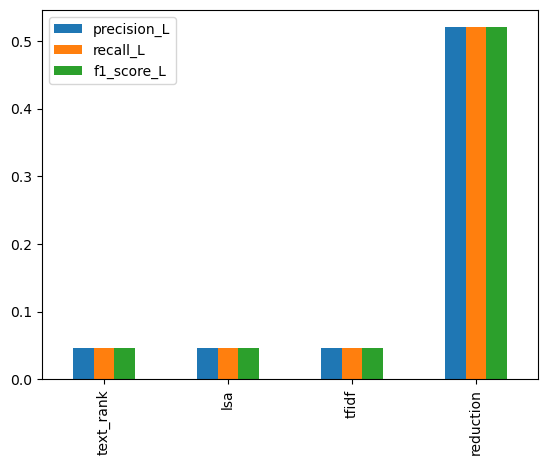

In [193]:
eval_res.plot.bar()

In [194]:
#visualize distribution of original text and summarizations 

In [201]:
count_words = lambda text : len(text.split())
data_counts = {}
for col in results.columns:
    data_counts[col] = results[col].apply(count_words).values

In [202]:
data_counts

{'text': array([284, 367,  51, ..., 921, 213, 301], dtype=int64),
 'tfidf_summy': array([112, 105,  51, ..., 110,  74,  91], dtype=int64),
 'lsa_summy': array([ 60,  93,  51, ..., 684,  91,  64], dtype=int64),
 'text_rank_summy': array([ 60,  93,  51, ..., 684,  91,  64], dtype=int64),
 'reduction_summy': array([ 72, 109,  51, ..., 683,  91,  45], dtype=int64)}

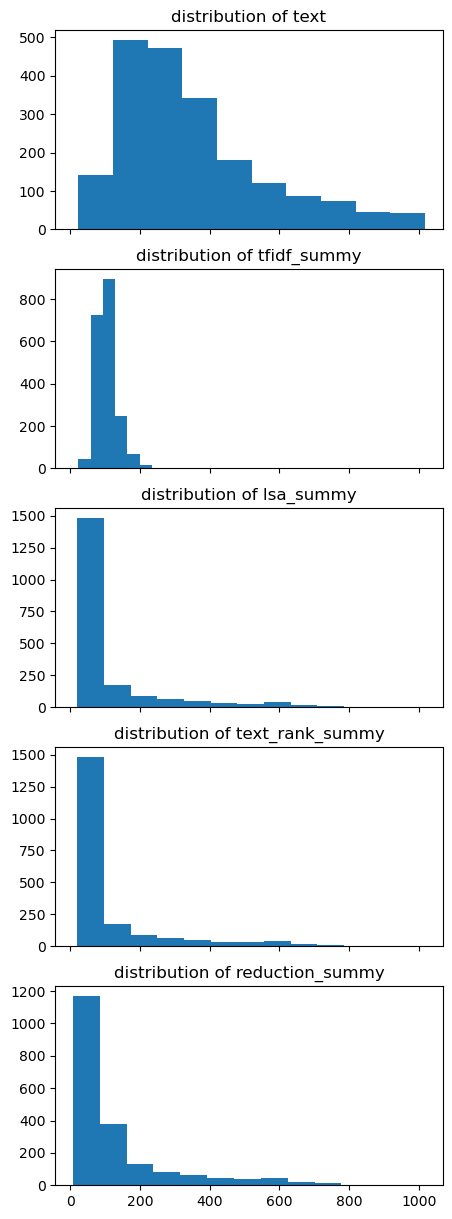

In [204]:
fig , axes = plt.subplots(5 , 1 , figsize=(5, 15) , sharex=True)

for ax , col in zip(axes.flatten() , results.columns):
    ax.hist(data_counts[col])
    ax.set_title(f"distribution of {col}")